# GAN (Rede Adversária Generativa) Dígitos

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Reshape
from tensorflow.keras.regularizers import L1L2
import matplotlib.pyplot as plt

In [4]:
(X_treinamento, _), (_, _) = mnist.load_data()
X_treinamento = X_treinamento.astype('float32') / 255
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size=600000).batch(batch_size=256)

# Gerador:
# 100 -> 500 -> 500
gerador = Sequential()
gerador.add(Dense(units = 500, input_dim=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Dense(units = 500, input_dim=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Dense(units = 784, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
gerador.add(Reshape((28, 28)))
gerador.summary()

# Discriminador:
# (28, 28)/784 -> 500 -> 500 -> 1
discriminador = Sequential()
discriminador.add(InputLayer(input_shape=(28,28)))
discriminador.add(Flatten())
discriminador.add(Dense(units=500, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units=500, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.add(Dense(units=1, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)))
discriminador.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 784)            │       392,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,784 (2.65 MB)

 Trainable params: 693,784 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,501 (2.45 MB)

 Trainable params: 643,501 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

epochs = 100
noise_dim = 100

tf.random.normal([256, noise_dim])

<tf.Tensor: shape=(256, 100), dtype=float32, numpy=
array([[-1.1204844 , -1.8767078 ,  0.00604055, ..., -0.38477916,
         1.2997873 ,  1.0382231 ],
       [ 0.30680853, -0.0183284 , -0.18329138, ...,  0.2960122 ,
        -0.79401976, -0.19288209],
       [ 1.0163655 ,  1.4752089 , -0.8211909 , ..., -0.9116613 ,
         0.04964305, -1.4539224 ],
       ...,
       [-0.5046245 , -0.02861429,  0.42515153, ..., -0.21071522,
         1.2543198 , -0.07906412],
       [ 1.3572522 , -0.44856274,  1.3761567 , ..., -1.3143017 ,
         0.26104012,  0.57572824],
       [ 0.4969328 , -0.24434365, -2.4541104 , ...,  0.26267126,
        -0.16860422, -0.76098627]], dtype=float32)>

93


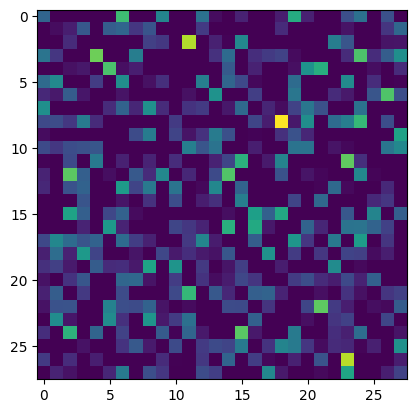

In [91]:
import random
numero = random.randint(0, 200)
print(numero)

plt.imshow(gerador(tf.random.normal([256, noise_dim]))[numero]);

In [92]:
def train_step(images):
  noise = tf.random.normal([256, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = gerador(noise, training = True)

    real_output = discriminador(images, training = True)
    fake_output = discriminador(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, gerador.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminador.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, gerador.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminador.trainable_variables))

  return gen_loss, disc_loss

In [93]:
for epoch in range(epochs):
  for image_batch in X_treinamento:
    gen_loss_batch, disc_loss_batch = train_step(image_batch)
  print(f'Época {epoch} | gen_loss: {gen_loss_batch} disc_loss {disc_loss_batch}')

Época 0 | gen_loss: 4.035558223724365 disc_loss 0.09984024614095688
Época 1 | gen_loss: 5.941654205322266 disc_loss 0.020966850221157074
Época 2 | gen_loss: 6.1543192863464355 disc_loss 0.009094031527638435
Época 3 | gen_loss: 6.235957145690918 disc_loss 0.007103053852915764
Época 4 | gen_loss: 4.942033767700195 disc_loss 0.018893670290708542
Época 5 | gen_loss: 3.0257997512817383 disc_loss 0.06983690708875656
Época 6 | gen_loss: 5.033466339111328 disc_loss 0.020994748920202255
Época 7 | gen_loss: 5.616446495056152 disc_loss 0.008379739709198475
Época 8 | gen_loss: 6.835444450378418 disc_loss 0.0028929882682859898
Época 9 | gen_loss: 7.41390323638916 disc_loss 0.007795722223818302
Época 10 | gen_loss: 6.921997547149658 disc_loss 0.0036155134439468384
Época 11 | gen_loss: 7.861793518066406 disc_loss 0.013374521397054195
Época 12 | gen_loss: 8.119977951049805 disc_loss 0.003487069858238101
Época 13 | gen_loss: 7.329261779785156 disc_loss 0.0033155428245663643
Época 14 | gen_loss: 6.77891

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


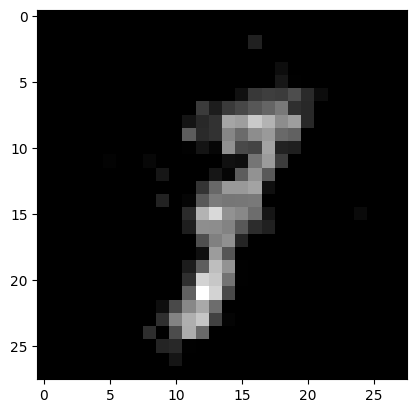

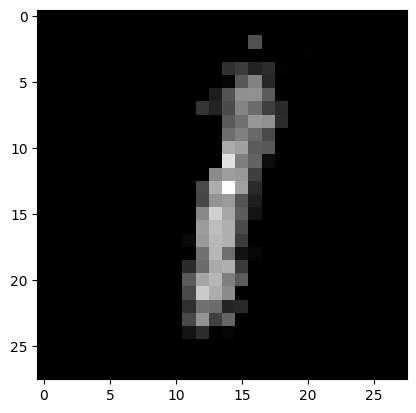

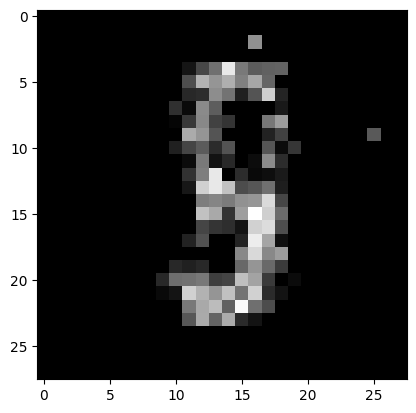

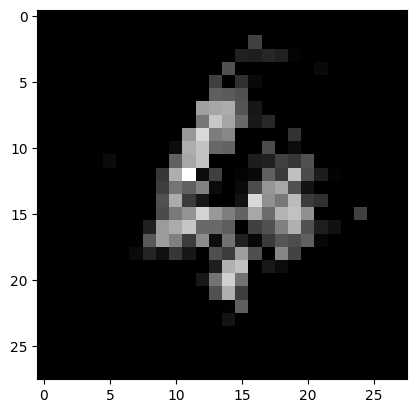

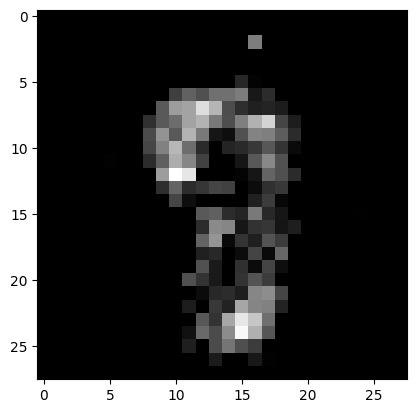

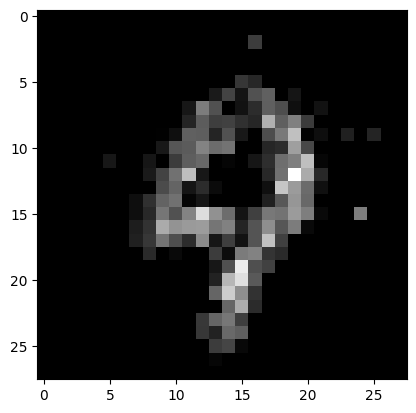

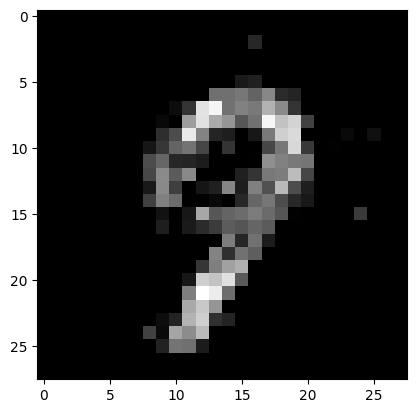

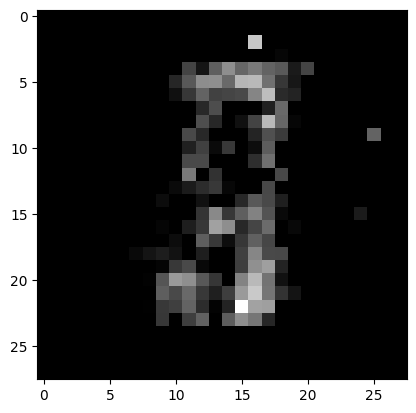

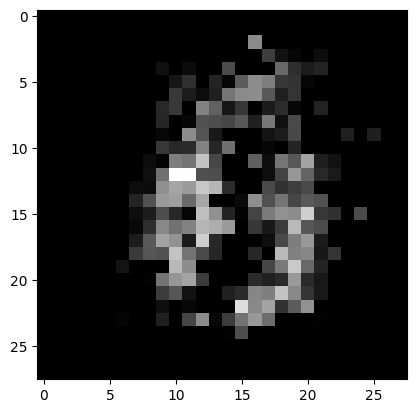

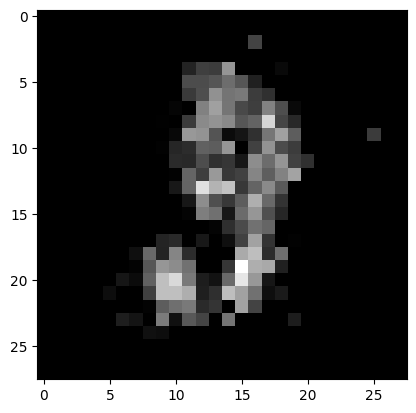

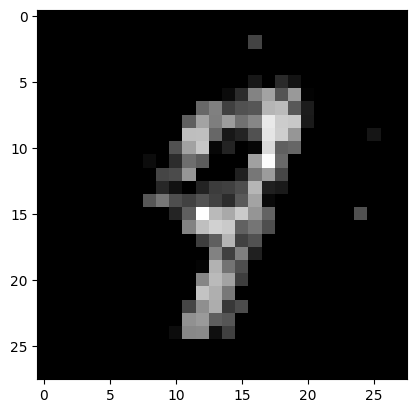

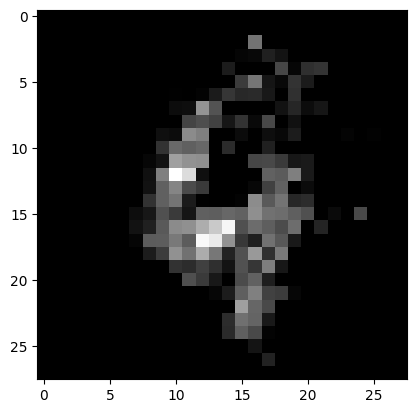

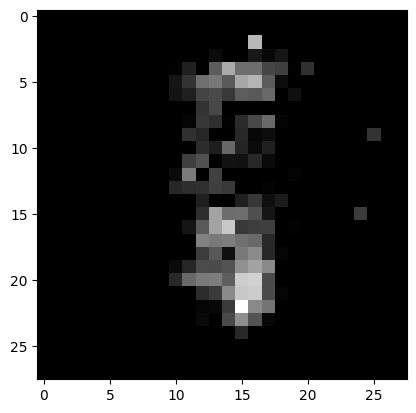

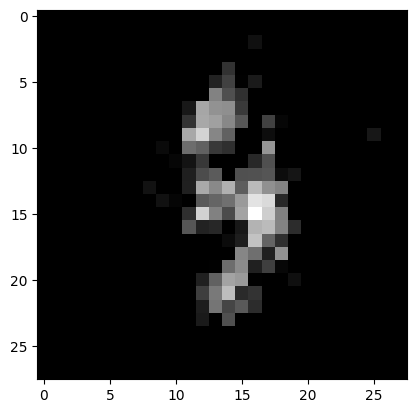

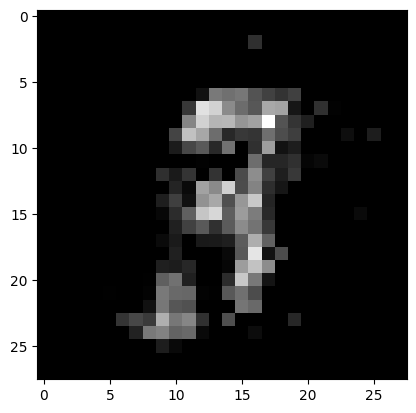

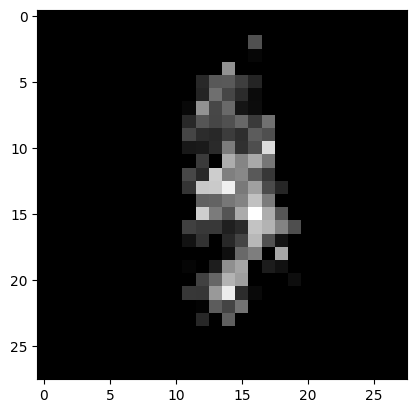

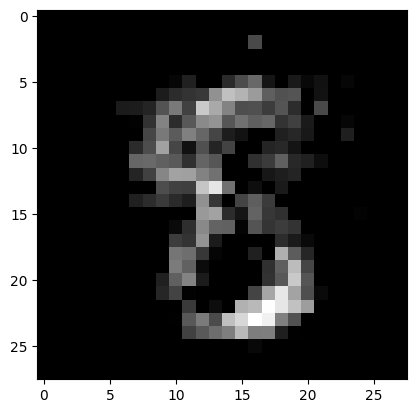

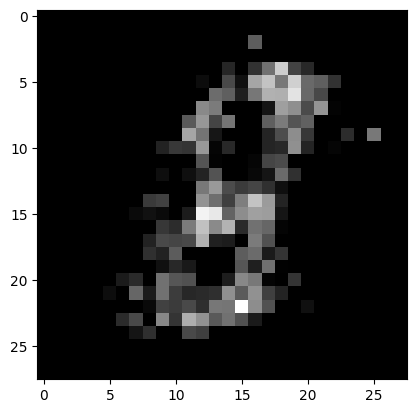

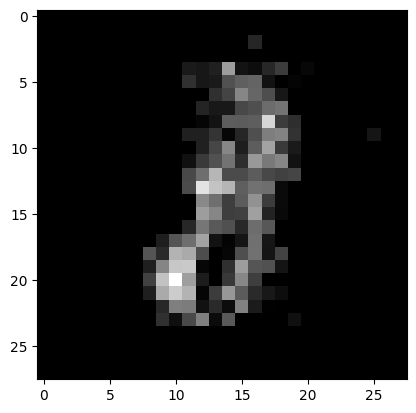

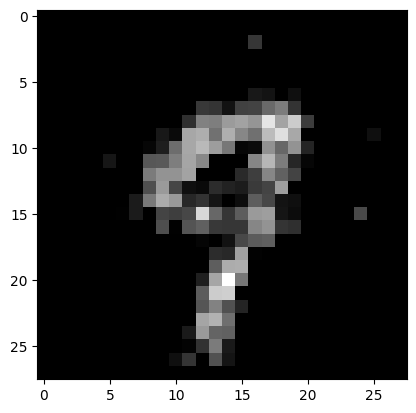

In [34]:
amostras = np.random.normal(size=(20, 100))
previsao = gerador.predict(amostras)
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :], cmap='gray')
  plt.show()